In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/mnt/c/Users/Jovan Bogoevski/StreamsSongs/data/converted_file.csv')

# Display the first few rows with enhanced styling
# Using the `style` API to enhance the appearance of the DataFrame
styled_data = data.head(10).style.set_caption("Sample Data Preview").set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#3498db'), ('color', 'white'), ('font-weight', 'bold')]
    },
    {
        'selector': 'tbody td',
        'props': [('border', '1px solid #ddd')]
    }]
).highlight_max(color='lightgreen').highlight_min(color='salmon')

styled_data

,artist,song,duration,ts,sessionId,auth,level,itemInSession,city,zip,state,userAgent,lon,lat,userId,lastName,firstName,gender,registration
0,U2,Walk On,266.631380,1728218274691,2365,Logged In,paid,9,Shirley,11967,NY,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0,-72.875477,40.794778,2366,Thomas,Patrick,M,1722487334691
1,Secret Garden,Heartstrings,201.508120,1728218280691,16429,Logged In,paid,78,Idaho Falls,83404,ID,Mozilla/5.0 (Windows NT 6.2; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,-112.012073,43.422784,9636,Tran,Charlie,F,1717021877691
2,Neotropic,Weeds,209.005260,1728218283691,4903,Logged In,free,0,Glenmont,12077,NY,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",-73.777695,42.588163,4904,Douglas,Samyuktha,F,1724901410691
3,Ace Hood / Trey Songz / Rick Ross / Juelz Santana,Ride Remix,235.179950,1728218283691,8260,Logged In,paid,7,North Richland Hills,76180,TX,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",-97.225295,32.840011,8261,Quinn,Darrius,M,1725721466691
4,matchbox twenty,If You're Gone (Remastered Version),274.285250,1728218291691,14083,Logged In,free,0,Jacksonville,32218,FL,"""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",-81.667141,30.487775,7466,Fox,Alexander,M,1720373748691
5,Dwight Yoakam,You're The One,239.307300,1728218293691,5187,Logged In,paid,0,Calistoga,94515,CA,Mozilla/5.0 (Windows NT 6.0; rv:31.0) Gecko/20100101 Firefox/31.0,-122.615051,38.634822,5188,Raymond,Giovanni,M,1715322841691
6,Florence + The Machine,Rabbit Heart (Raise It Up),290.481170,1728218305691,12992,Logged In,paid,15,Anaheim,92805,CA,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0,-117.906109,33.830209,3198,Dominguez,Carson,M,1727484005691
7,Tom Waits,Step Right Up (LP Version),340.531800,1728218316691,15453,Logged In,paid,28,Placerville,95667,CA,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",-120.789952,38.734925,1614,Ramirez,Charles,M,1725137275691
8,Edward Sharpe & The Magnetic Zeros,Desert Song,270.262400,1728218319691,2311,Logged In,paid,18,Fernandina Beach,32034,FL,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,-81.491720,30.609692,2312,Smith,Quinten,M,1725404726691
9,Vampire Weekend,Walcott (Album),221.648530,1728218321691,5044,Logged In,free,1,Clearwater,33756,FL,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2""",-82.793867,27.945386,5045,Larsen,Mason,M,1726155489691


In [ ]:
'''
Here are the attributes in the listen_events dataset, along with their meanings:
artist: Name of the artist whose song is being streamed.
song: Title of the song being streamed.
duration: Duration of the song in seconds.
ts: Timestamp of the event in milliseconds.
sessionId: Unique identifier for the user session during which the song is played.
auth: Authentication status, typically "Logged In" for active sessions.
level: User subscription level, such as "paid" or "free".
itemInSession: Sequence number of the song within the session.
city: City where the user is located during the event.
zip: ZIP code of the user's location.
state: State where the user is located.
userAgent: Information about the user's device and browser.
lon: Longitude of the user's location.
lat: Latitude of the user's location.
userId: Unique identifier for the user.
lastName: User's last name.
firstName: User's first name.
gender: User's gender.
registration: Registration timestamp of the user in milliseconds.
This dataset allows you to analyze various aspects of user activity, such as listening patterns, geographic location, and subscription level. ​
'''

In [14]:
# Basic Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
           duration            ts     sessionId  itemInSession           zip  \
count  44826.000000  4.482600e+04  44826.000000   44826.000000  44826.000000   
mean     248.057268  1.728329e+12  13834.328113      20.567729  50515.052358   
std       95.315035  5.657242e+07   7014.208450      26.233955  29388.581945   
min        1.122810  1.728218e+12      2.000000       0.000000   1008.000000   
25%      199.189758  1.728291e+12   7165.000000       2.000000  28027.000000   
50%      233.690980  1.728326e+12  15944.000000      11.000000  46307.000000   
75%      275.199550  1.728381e+12  19480.000000      29.000000  78112.000000   
max     3024.665800  1.728420e+12  25492.000000     211.000000  99705.000000   

                lon           lat        userId  registration  
count  44826.000000  44826.000000  44826.000000  4.482600e+04  
mean     -91.593779     37.631775   5146.605854  1.718321e+12  
std       16.392405      5.225060   2850.796799  1.039329e+10  
mi

In [15]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
artist           0
song             0
duration         0
ts               0
sessionId        0
auth             0
level            0
itemInSession    0
city             0
zip              0
state            0
userAgent        0
lon              0
lat              0
userId           0
lastName         0
firstName        0
gender           0
registration     0
dtype: int64


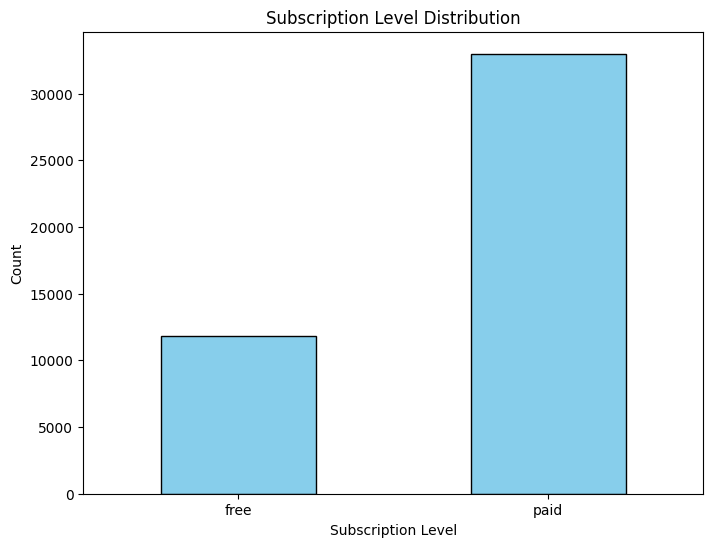

In [7]:
import matplotlib.pyplot as plt  # Correct import statement for pyplot

# Step 1: Subscription Level Distribution
level_distribution = data.groupby('level').size()
plt.figure(figsize=(8, 6))
level_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Subscription Level Distribution')
plt.xlabel('Subscription Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

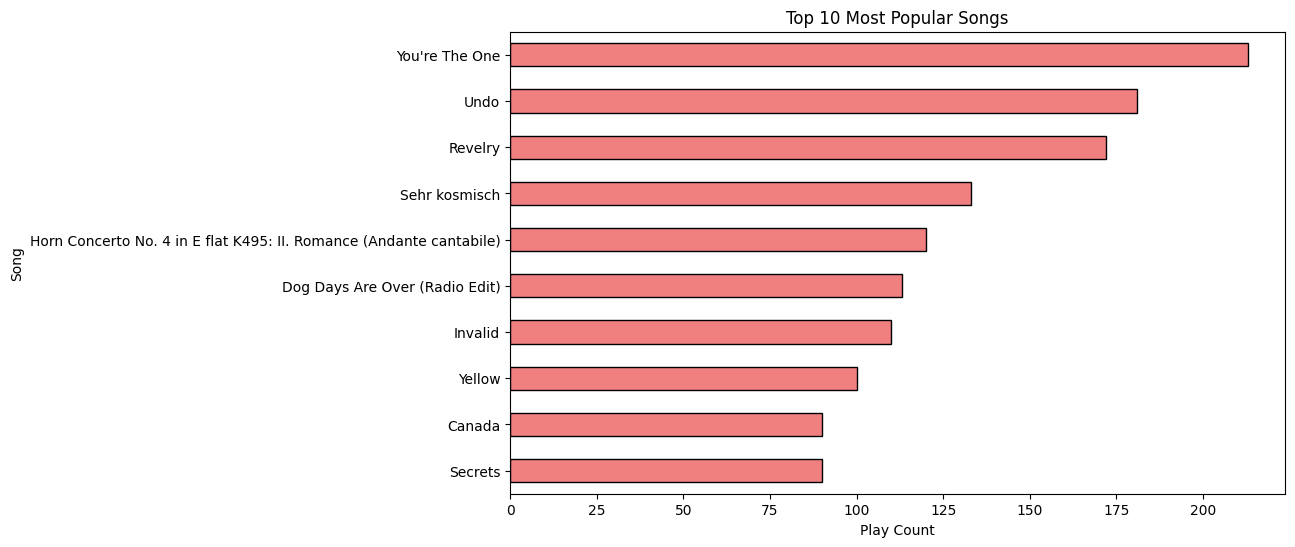

In [8]:
# Step 2: Top 10 Most Popular Songs
song_popularity = data.groupby('song').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
song_popularity.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.gca().invert_yaxis()
plt.show()

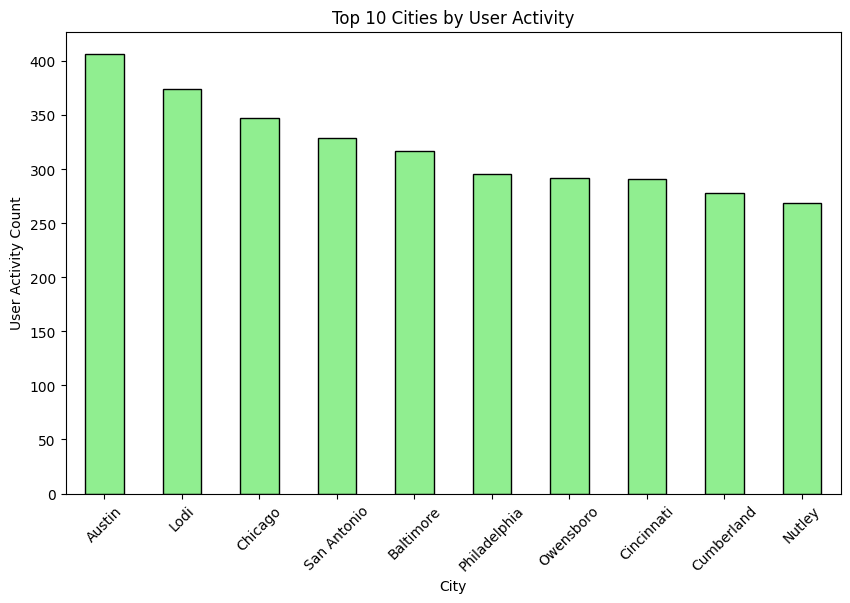

In [9]:
# Step 3: Top 10 Cities by User Activity
city_activity = data.groupby('city').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
city_activity.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Cities by User Activity')
plt.xlabel('City')
plt.ylabel('User Activity Count')
plt.xticks(rotation=45)
plt.show()

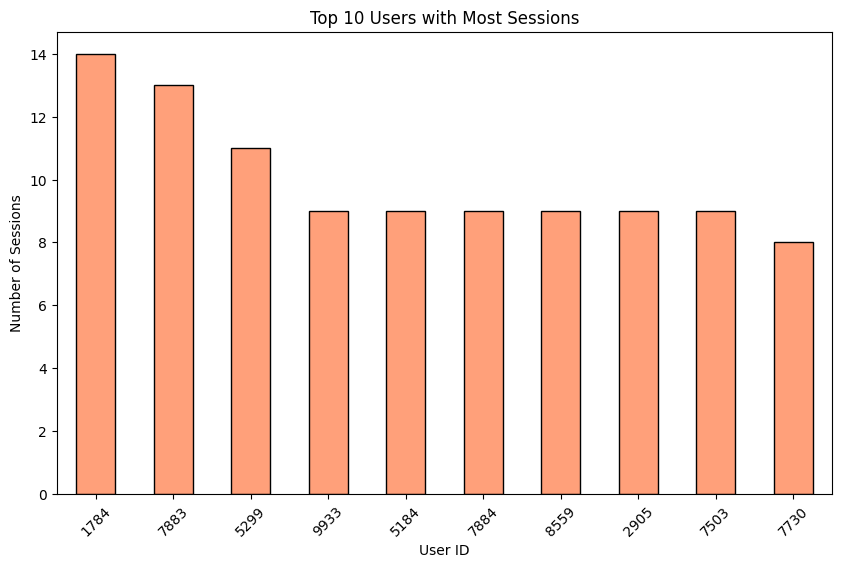

In [10]:
# Step 4: Top 10 Users with Most Sessions
sessions_per_user = data.groupby('userId')['sessionId'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sessions_per_user.plot(kind='bar', color='lightsalmon', edgecolor='black')
plt.title('Top 10 Users with Most Sessions')
plt.xlabel('User ID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

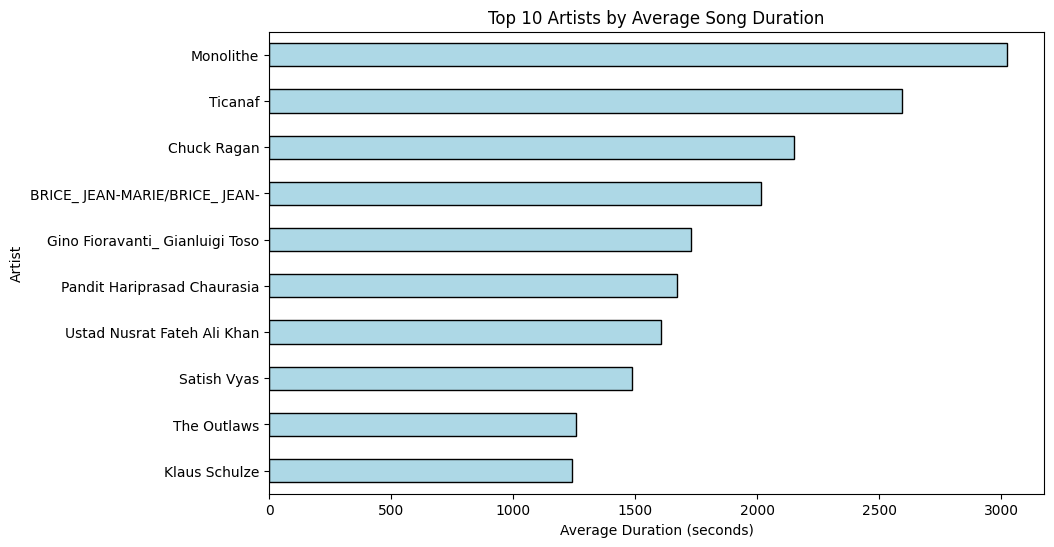

In [11]:
# Step 5: Top 10 Artists by Average Song Duration
average_duration_by_artist = data.groupby('artist')['duration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
average_duration_by_artist.plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('Top 10 Artists by Average Song Duration')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.show()

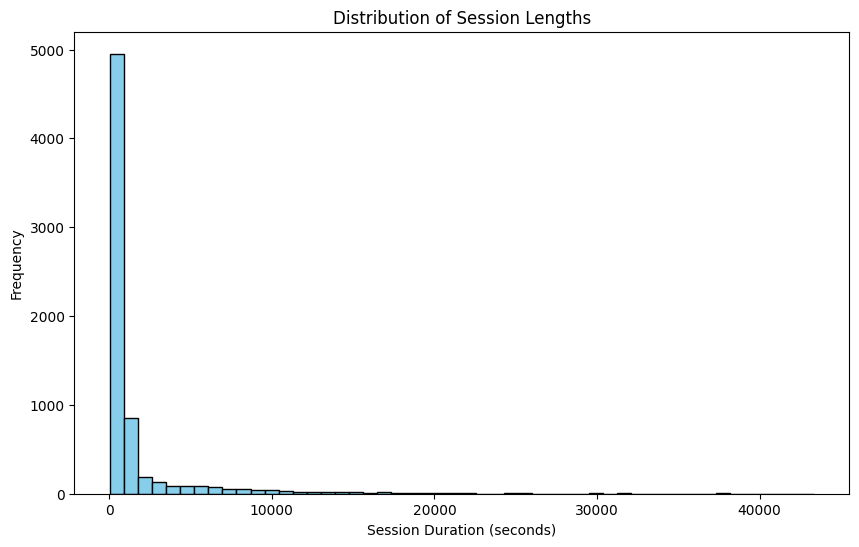

In [12]:
# Calculate session length for each session
session_duration = data.groupby(['userId', 'sessionId'])['duration'].sum().reset_index()

# Plot the distribution of session lengths
plt.figure(figsize=(10, 6))
plt.hist(session_duration['duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Session Lengths')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_29276/2518616043.py:18: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/jovanbogoeski/.local/share/pipx/venvs/notebook/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


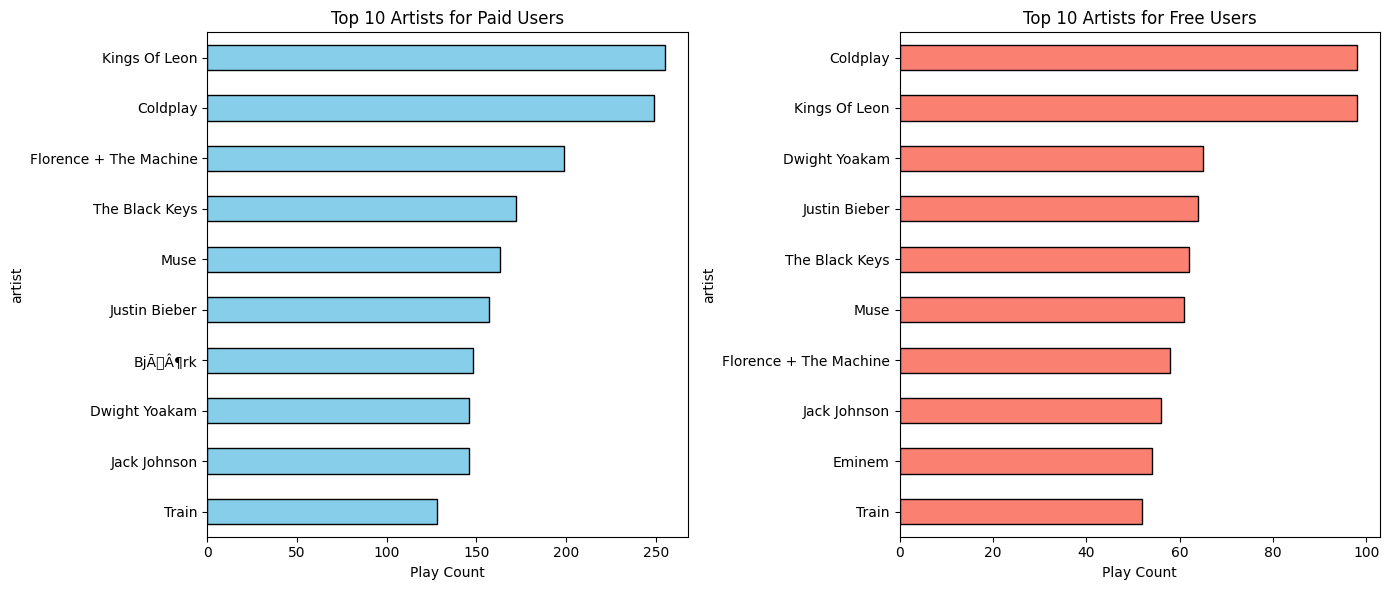

In [13]:
# Get top 10 artists for each subscription level
artist_popularity_level = data.groupby(['level', 'artist']).size().unstack().fillna(0)
top_artists_paid = artist_popularity_level.loc['paid'].sort_values(ascending=False).head(10)
top_artists_free = artist_popularity_level.loc['free'].sort_values(ascending=False).head(10)

# Plotting side-by-side bar charts for top artists
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
top_artists_paid.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax[0])
ax[0].set_title('Top 10 Artists for Paid Users')
ax[0].invert_yaxis()
ax[0].set_xlabel('Play Count')

top_artists_free.plot(kind='barh', color='salmon', edgecolor='black', ax=ax[1])
ax[1].set_title('Top 10 Artists for Free Users')
ax[1].invert_yaxis()
ax[1].set_xlabel('Play Count')

plt.tight_layout()
plt.show()
